In [35]:
import pandas as pd
import numpy as np
import importlib
import datetime
import matplotlib.pyplot as plt
import plotly

In [94]:
filename = 'LSZH_MAY_SEP_df_movements.pkl'

df_movements = pd.read_pickle(filename)
df_movements

,flight_id,icao24,callsign,isTakeoff,isPushback,startPushback,startTaxi,lineupTime,taxiDuration,taxiDistance,...,icaoaircrafttype,nEngines,engIdleFF,APUhighFF,APUnormalFF,MESengine,MESapu,normTAXIengine,extAGPSapu,extAGPStug
2,AAL93_11938,aae1ea,AAL93,True,False,NaT,2024-05-05 09:48:15+00:00,2024-05-05 10:04:55+00:00,0 days 00:16:40,1.356054,...,L2J,2,0.223,262,238,93.66,16.666667,446.000,66.111111,NaN
3,AAL93_11941,aae597,AAL93,True,False,NaT,2024-05-01 09:51:09+00:00,2024-05-01 10:03:06+00:00,0 days 00:11:57,1.354637,...,L2J,2,0.223,262,238,93.66,16.666667,319.782,47.401667,NaN
4,AAL93_11945,ab1839,AAL93,True,False,NaT,2024-05-09 10:01:50+00:00,2024-05-09 10:19:47+00:00,0 days 00:17:57,1.112419,...,L2J,2,0.223,262,238,93.66,16.666667,480.342,71.201667,NaN
5,AAL93_11947,ab1fa7,AAL93,True,True,2024-05-03 09:43:46+00:00,2024-05-03 09:44:57+00:00,2024-05-03 09:56:52+00:00,0 days 00:11:55,0.426034,...,L2J,2,0.223,262,238,93.66,16.666667,318.890,47.269444,NaN
6,AAL93_11950,ab236a,AAL93,True,False,NaT,2024-05-04 09:41:23+00:00,2024-05-04 09:52:56+00:00,0 days 00:11:33,0.788887,...,L2J,2,0.223,262,238,93.66,16.666667,309.078,45.815000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57567,VLG7516_174,344099,VLG7516,True,False,NaT,2024-09-27 12:52:06+00:00,2024-09-27 12:55:13+00:00,0 days 00:03:07,0.322391,...,L2J,2,0.107,130,110,44.94,8.000000,40.018,5.713889,NaN
57568,VLG7516_222,344697,VLG7516,True,False,NaT,2024-09-30 08:53:26+00:00,2024-09-30 08:55:29+00:00,0 days 00:02:03,0.386516,...,L2J,2,0.107,130,110,44.94,8.000000,26.322,3.758333,NaN
57569,VLG7516_247,345645,VLG7516,True,False,NaT,2024-09-23 08:40:30+00:00,2024-09-23 08:46:04+00:00,0 days 00:05:34,0.922098,...,L2J,2,0.107,130,110,44.94,8.000000,71.476,10.205556,NaN
57570,VLG7516_270,346090,VLG7516,True,False,NaT,2024-09-25 12:47:27+00:00,2024-09-25 12:52:50+00:00,0 days 00:05:23,0.34366,...,L2J,2,0.080,130,110,33.60,8.000000,51.680,9.869444,NaN


In [95]:
df_movements = df_movements.query('takeoffRunway!="14"')

***
# Overview on Dataset
***

In [86]:
df_movements.dtypes

flight_id                    string[python]
icao24                       string[python]
callsign                     string[python]
isTakeoff                           boolean
isPushback                          boolean
startPushback           datetime64[ns, UTC]
startTaxi               datetime64[ns, UTC]
lineupTime              datetime64[ns, UTC]
taxiDuration                timedelta64[ns]
taxiDistance                        Float64
takeoffRunway                string[python]
typecode                     string[python]
icaoaircrafttype             string[python]
nEngines                              int64
engIdleFF                           float64
APUhighFF                             int64
APUnormalFF                           int64
MESengine                           float64
MESapu                              float64
normTAXIengine                      float64
extAGPSapu                          float64
extAGPStug                          float64
taxiDuration_minutes            

In [117]:
# overview = df_movements.groupby('takeoffRunway')['taxiDuration'].agg(['count', 'mean', 'std']).reset_index()


import agps_funs
from agps_config import AC2CONSIDER
importlib.reload(agps_funs)

# Concatinate df_movements of multiple months
file_paths = ['LSZH_MAY24_1_df_movements.pkl', 'LSZH_MAY24_2_df_movements.pkl', 'LSZH_MAY24_3_df_movements.pkl',
              'LSZH_JUN24_1_df_movements.pkl', 'LSZH_JUN24_2_df_movements.pkl', 'LSZH_JUN24_3_df_movements.pkl',
              'LSZH_JUL24_1_df_movements.pkl', 'LSZH_JUL24_2_df_movements.pkl', 'LSZH_JUL24_3_df_movements.pkl',
              'LSZH_AUG24_1_df_movements.pkl', 'LSZH_AUG24_2_df_movements.pkl', 'LSZH_AUG24_3_df_movements.pkl',
              'LSZH_SEP24_1_df_movements.pkl', 'LSZH_SEP24_2_df_movements.pkl', 'LSZH_SEP24_3_df_movements.pkl',
              ]


df_list = [pd.read_pickle(file) for file in file_paths]
df_movements = pd.concat(df_list, ignore_index=True).convert_dtypes()

df_movements = df_movements.query('isTakeoff')
df_movements = df_movements.query('takeoffRunway!="14"')



# Filter the DataFrame
df_filtered = df_movements.loc[
    (df_movements['lineupTime'] > pd.Timestamp('2024-05-01 00:00', tz='UTC')) &
    (df_movements['lineupTime'] < pd.Timestamp('2024-09-01 00:00', tz='UTC'))
]

# overview = df_filtered.groupby('takeoffRunway')['takeoffRunway'].agg(['count']).reset_index()

overview = df_filtered.groupby('takeoffRunway')['taxiDuration'].agg(['count', 'mean', 'std']).reset_index()


# # Add May 2024 data
# overview['count_FZAG_MAY'] = [173, 1014, 7251, 3140, 156]

# # Add June 2024 data
# overview['count_FZAG_JUN'] = [236, 1151, 7309, 2826, 155]

# # Add July 2024 data
# overview['count_FZAG_JUL'] = [29, 1497,	6841, 3594,	144]

# # # Add August 2024 data
# overview['count_FZAG_AUG'] = [296, 1365, 7341, 2772, 144]

# # Add MAY to AUG data
overview['count_FZAG'] = [734, 5027, 28742, 12332, 599]

overview['Error'] = (overview['count']-overview['count_FZAG'])/overview['count_FZAG']*100


# Calculate the overall summary row
overall_count = overview['count'].sum()
overall_mean = df_filtered['taxiDuration'].mean()
overall_std = df_filtered['taxiDuration'].std()
overall_count_FZAG = overview['count_FZAG'].sum()
overall_error = (overall_count - overall_count_FZAG) / overall_count_FZAG * 100

# Create a new row for the overall summary as a DataFrame
overall_row = pd.DataFrame({
    'takeoffRunway': ['all'],
    'count': [overall_count],
    'mean': [overall_mean],
    'std': [overall_std],
    'count_FZAG': [overall_count_FZAG],
    'Error': [overall_error]
})

# Concatenate the new row to the existing DataFrame
overview = pd.concat([overview, overall_row], ignore_index=True)

# If 'mean' and 'std' columns are not in timedelta format, convert them back first
overview['mean'] = pd.to_timedelta(overview['mean'], errors='coerce')
overview['std'] = pd.to_timedelta(overview['std'], errors='coerce')

# Format 'mean' and 'std' columns to show only minutes and seconds
overview['mean'] = overview['mean'].apply(lambda x: f"{x.components.minutes:02}:{x.components.seconds:02}" if pd.notnull(x) else "NaT")
overview['std'] = overview['std'].apply(lambda x: f"{x.components.minutes:02}:{x.components.seconds:02}" if pd.notnull(x) else "NaT")

# Rearrange the columns in the specified order
overview = overview[['takeoffRunway', 'mean', 'std', 'count', 'count_FZAG', 'Error']]

# Export the DataFrame to LaTeX format with the rearranged columns
latex_output = overview.to_latex(index=False, float_format="%.2f", longtable=False, escape=False)

# Print the LaTeX output
print(latex_output)


\begin{tabular}{lllrrr}
\toprule
takeoffRunway & mean & std & count & count_FZAG & Error \\
\midrule
10 & 09:56 & 06:17 & 773 & 734 & 5.31 \\
16 & 12:50 & 05:35 & 4800 & 5027 & -4.52 \\
28 & 08:14 & 06:51 & 27965 & 28742 & -2.70 \\
32 & 08:23 & 05:51 & 11872 & 12332 & -3.73 \\
34 & 09:46 & 05:25 & 559 & 599 & -6.68 \\
all & 08:48 & 06:37 & 45969 & 47434 & -3.09 \\
\bottomrule
\end{tabular}



/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_99810/1561189363.py:20: RuntimeWarning:

Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.



\begin{tabular}{lrllrr}
\toprule
takeoffRunway & count & mean & std & count_FZAG & Error \\
\midrule
10 & 773 & 0 days 00:09:56 & 0 days 00:06:17 & 734 & 5.31 \\
16 & 4800 & 0 days 00:12:50 & 0 days 00:05:35 & 5027 & -4.52 \\
28 & 27965 & 0 days 00:08:14 & 0 days 00:06:52 & 28742 & -2.70 \\
32 & 11872 & 0 days 00:08:23 & 0 days 00:05:51 & 12332 & -3.73 \\
34 & 559 & 0 days 00:09:47 & 0 days 00:05:25 & 599 & -6.68 \\
all & 45969 & 0 days 00:08:48 & 0 days 00:06:37 & 47434 & -3.09 \\
\bottomrule
\end{tabular}



***
# Plotting
***

In [75]:
fontsize_ticks = 12
fontsize_xylabels = 14
fontsize_title = 16

/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_99810/198522293.py:14: RuntimeWarning:

Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.

/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_99810/198522293.py:128: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




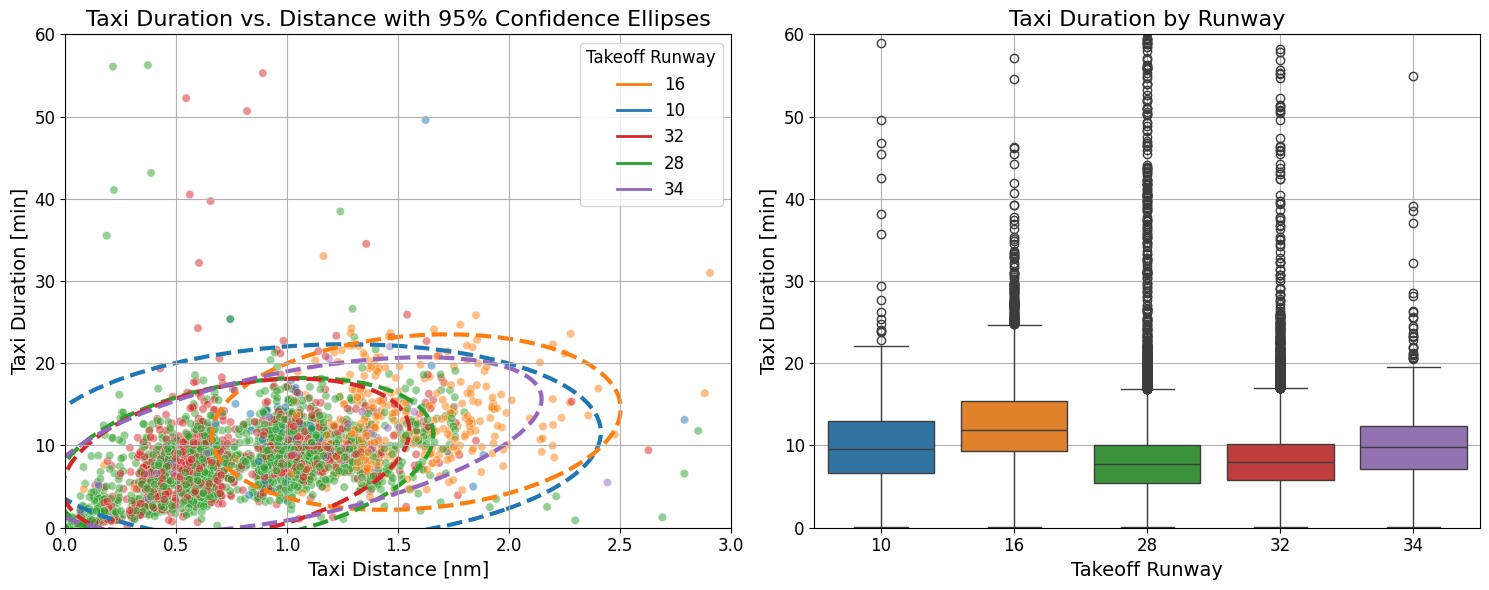

In [71]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib.lines import Line2D
import seaborn as sns

# Convert taxiDuration to total seconds for scatter plotting
df_movements['taxiDuration_minutes'] = df_movements['taxiDuration'].dt.total_seconds()/60

# Filter out rows where takeoffRunway is "10"
#df_filtered = df_movements[df_movements['takeoffRunway'] != '10']
df_filtered = df_movements[df_movements['takeoffRunway'] != '14']

# Get rid of the worst outliers
df_filtered = df_filtered.query('taxiDistance < 7.5').query('taxiDuration_minutes < 3000')

# Set a nicer color palette
sns.set_palette("tab10")

# Function to draw an ellipse representing the 95% confidence interval
def confidence_ellipse(x, y, ax, n_std=1.96, edgecolor='black', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radii.

    edgecolor : str
        The color of the ellipse's edge.

    kwargs : dict
        Additional keyword arguments to `matplotlib.patches.Ellipse`.
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, edgecolor=edgecolor, facecolor='none', linewidth=3, **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    transf = (
        transforms.Affine2D()
        .rotate_deg(45)
        .scale(scale_x, scale_y)
        .translate(mean_x, mean_y)
    )

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Number of points you want to sample
n = 3000

# Ensure you don't sample more points than available in the DataFrame
n = min(n, len(df_filtered))

# Randomly sample n points from the DataFrame
df_sampled = df_filtered.sample(n)

# Specify the desired order for takeoff runways
runway_order = ['10', '16', '28', '32', '34']

# Left subplot: Scatter plot of Taxi Duration vs. Taxi Distance colored by takeoffRunway
scatter = sns.scatterplot(
    data=df_sampled,
    x='taxiDistance', 
    y='taxiDuration_minutes', 
    hue='takeoffRunway', 
    palette='tab10',  # Use a nicer color palette
    hue_order=runway_order,  # Ensure the order is consistent
    ax=axs[0],
    alpha=0.5,  # Set scatter points with slight alpha
    legend=False
)

# Get the current color palette and map it to runways using the specified order
palette = sns.color_palette("tab10", len(runway_order))
runway_colors = {runway: palette[i] for i, runway in enumerate(runway_order)}

# Add 95% confidence ellipses for each runway
for runway in runway_order:
    subset = df_filtered[df_filtered['takeoffRunway'] == runway]
    confidence_ellipse(
        subset['taxiDistance'], 
        subset['taxiDuration_minutes'],
        axs[0], 
        edgecolor=runway_colors[runway],  # Use the mapped color for the runway
        linestyle='--',
        alpha=1,
    )

axs[0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axs[0].set_xlabel('Taxi Distance [nm]', fontsize = fontsize_xylabels)
axs[0].set_ylabel('Taxi Duration [min]', fontsize = fontsize_xylabels)
axs[0].set_title('Taxi Duration vs. Distance with 95% Confidence Ellipses', fontsize=fontsize_title)
axs[0].grid(True)
axs[0].set_ylim((0,60))
axs[0].set_xlim((0,3))

# Create custom legend handles for the ellipses
custom_lines = [Line2D([0], [0], color=runway_colors[runway], lw=2) for runway in df_filtered['takeoffRunway'].unique()]
axs[0].legend(custom_lines, df_filtered['takeoffRunway'].unique(), 
              title='Takeoff Runway', 
              fontsize=12, 
              title_fontsize=12,
              loc='upper right')


# Right subplot: Box plot of Taxi Distances for each runway in the specified order
sns.boxplot(
    data=df_filtered,
    x='takeoffRunway',
    y='taxiDuration_minutes',
    palette='tab10',  # Use the same color palette
    order=runway_order,  # Specify the order of the runways
    ax=axs[1]
)
axs[1].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axs[1].set_xlabel('Takeoff Runway', fontsize=fontsize_xylabels)
axs[1].set_ylabel('Taxi Duration [min]', fontsize=fontsize_xylabels)
axs[1].set_title('Taxi Duration by Runway', fontsize=fontsize_title)
axs[1].grid(True)
axs[1].set_ylim((0,60))

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig('taxi_distance_duration_MAY_SEP24.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_99810/2401891185.py:18: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_99810/2401891185.py:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_99810/2401891185.py:18: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_99810/2401891185.py:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_99810/2401891185.py:18: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_99810/2401891185.py:19: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/84/0lntlwrj46zgpwppns

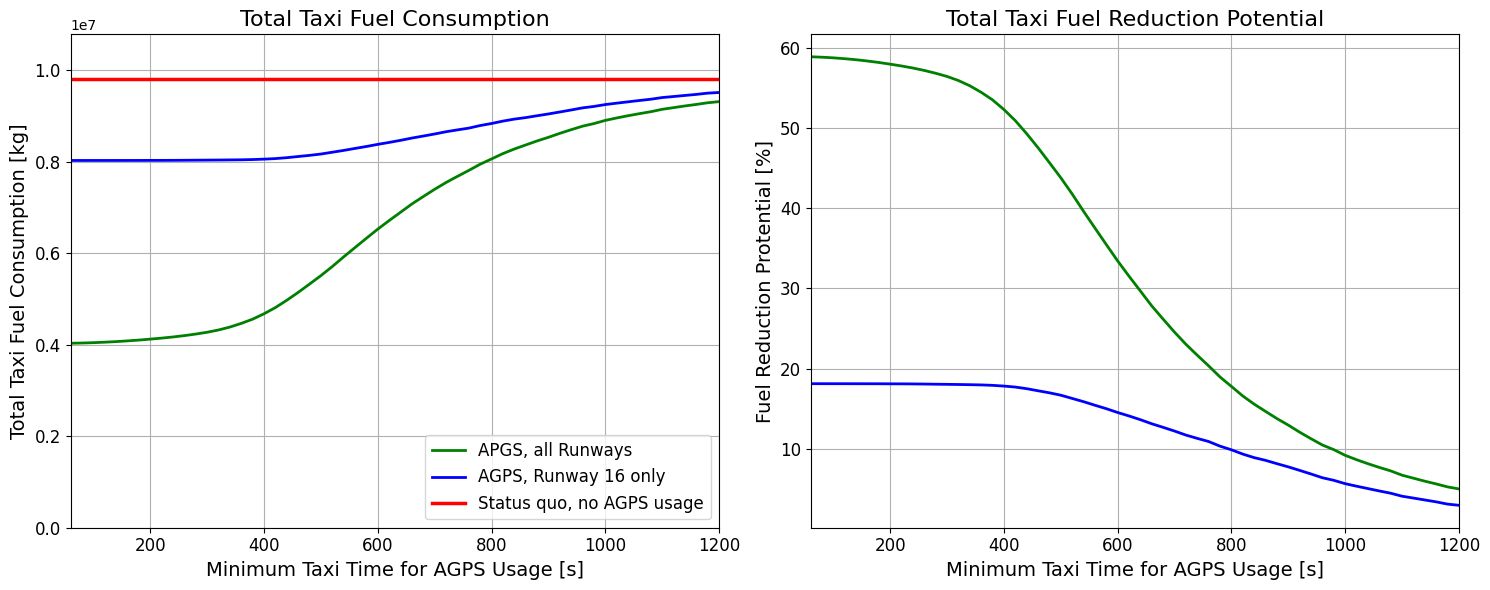

In [82]:
baseline = df_movements['MESengine'].sum() + df_movements['MESapu'].sum() + df_movements['normTAXIengine'].sum()


minTaxiDuration = np.arange(60,1201,20)

AGPS_rwy_all = []
AGPS_rwy_16 = []


for taxiDuration in minTaxiDuration:

    MES_eng_apu = df_movements['MESengine'].sum() + df_movements['MESapu'].sum()

    agps_fuel = df_movements[df_movements['taxiDuration']>=datetime.timedelta(seconds=int(taxiDuration))][['extAGPSapu', 'extAGPStug']].sum().sum()
    non_agps_fuel = df_movements[df_movements['taxiDuration']<datetime.timedelta(seconds=int(taxiDuration))]['normTAXIengine'].sum()
    AGPS_rwy_all.append(MES_eng_apu + agps_fuel+ non_agps_fuel)

    agps_fuel = df_movements.query('takeoffRunway == "16"')[df_movements['taxiDuration']>=datetime.timedelta(seconds=int(taxiDuration))][['extAGPSapu', 'extAGPStug']].sum().sum()
    non_agps_fuel = df_movements.query('takeoffRunway == "16"')[df_movements['taxiDuration']<datetime.timedelta(seconds=int(taxiDuration))]['normTAXIengine'].sum() + df_movements.query('takeoffRunway != "16"')['normTAXIengine'].sum()
    AGPS_rwy_16.append(MES_eng_apu + agps_fuel + non_agps_fuel)
    

# Plot the results to see how minAGPSDuration affects total fuel consumption
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(minTaxiDuration, 
            AGPS_rwy_all, 
            color = 'g',
            label='APGS, all Runways',
            linewidth = 2)

axs[0].plot(minTaxiDuration,
            AGPS_rwy_16,
            color= 'b',
            label='AGPS, Runway 16 only',
            linewidth = 2)

# Add a horizontal line at a specific y-value (e.g., y=1000)
axs[0].axhline(y=baseline, color='r', linestyle='-', linewidth=2.5, label='Status quo, no AGPS usage')
axs[0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axs[0].set_xlim((min(minTaxiDuration), max(minTaxiDuration)))
axs[0].set_ylim((0, baseline * 1.1))

# Customize the plot
axs[0].set_title('Total Taxi Fuel Consumption', fontsize=fontsize_title)
axs[0].set_xlabel('Minimum Taxi Time for AGPS Usage [s]', fontsize=fontsize_xylabels)
axs[0].set_ylabel('Total Taxi Fuel Consumption [kg]', fontsize=fontsize_xylabels)
axs[0].grid(True)
axs[0].legend(loc='lower right', fontsize=fontsize_ticks)


axs[1].plot(minTaxiDuration,
            (baseline - AGPS_rwy_all)/baseline * 100,
            color = 'g',
            label='APGS, all Runways',
            linewidth = 2)


axs[1].plot(minTaxiDuration,
            (baseline - AGPS_rwy_16)/baseline * 100,
            color= 'b',
            label='AGPS, Runway 16 only',
            linewidth = 2)

axs[1].set_xlim((min(minTaxiDuration), max(minTaxiDuration)))
axs[1].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axs[1].set_title('Total Taxi Fuel Reduction Potential', fontsize=fontsize_title)
axs[1].set_xlabel('Minimum Taxi Time for AGPS Usage [s]', fontsize=fontsize_xylabels)
axs[1].set_ylabel('Fuel Reduction Protential [%]', fontsize=fontsize_xylabels)
axs[1].grid(True)



plt.tight_layout()
# Save the figure as a PDF
plt.savefig('taxi_fuel_MAY_SEP24.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()

/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_99810/2734617234.py:2: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.

/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_99810/2734617234.py:34: RuntimeWarning:

Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.

/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_99810/2734617234.py:34: RuntimeWarning:

Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.

/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_99810/2734617234.py:34: RuntimeWarning:

Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.

/var/folders/84/0lntlwrj46zgpwppnsr6znzw0000gr/T/ipykernel_99810/2734617234.py:34: RuntimeWarning:

Engine has switch

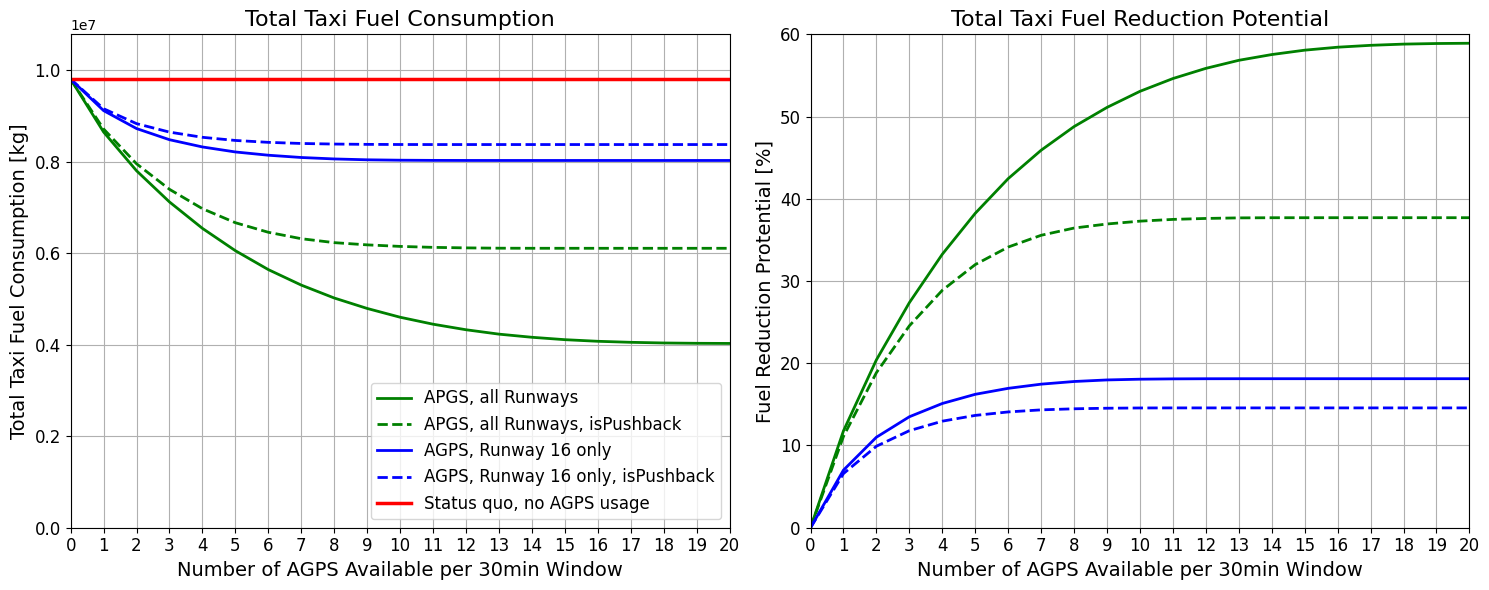

In [84]:
# Create a new column for half-hour intervals
df_movements.loc[:, 'startTaxi_half_hour'] = df_movements['startTaxi'].dt.floor('30T')

# Sort by taxiDuration within each group
df_sorted = df_movements.sort_values(['startTaxi_half_hour', 'taxiDuration'], ascending=[True, False])


nTugs = np.arange(0,21,1)

AGPS_rwy_all = []
AGPS_rwy_16 = []
AGPS_rwy_all_pb = []
AGPS_rwy_16_pb = []


MES_eng_apu = df_movements['MESengine'].sum() + df_movements['MESapu'].sum()


def calculate_fuel(df, nTug, filter_condition=None):
    """
    Calculate the total fuel used based on tugs assigned to aircraft.

    Parameters:
    - df: DataFrame containing the flight data.
    - nTug: The number of tugs available.
    - filter_condition: A query string to filter the DataFrame, e.g., 'takeoffRunway == "16"'. If None, no filtering is applied.

    Returns:
    - Total fuel used (agps_fuel + non_agps_fuel).
    """
    
    if filter_condition:
        # Filter the DataFrame based on the condition provided
        df_filtered = df.query(filter_condition)
    else:
        # No filtering, use the entire DataFrame
        df_filtered = df
    
    # Assign tugs to the top 'nTug' movements based on the startTaxi_half_hour
    df_tugs = df_filtered.groupby('startTaxi_half_hour').head(nTug)
    
    # Calculate the fuel used by movements with tugs
    agps_fuel = df_tugs[['extAGPSapu', 'extAGPStug']].sum().sum()
    
    # Find the remaining movements that do not have tugs
    df_remaining = df[~df.index.isin(df_tugs.index)]
    
    # Calculate the fuel used by movements without tugs
    non_agps_fuel = df_remaining['normTAXIengine'].sum()
    
    # Total fuel used
    total_fuel = agps_fuel + non_agps_fuel
    
    return total_fuel


for nTug in nTugs:
    # Group by half-hour intervals and select the top nTug rows in each group -> These movements are assigned a tug.
    AGPS_rwy_all.append(MES_eng_apu + calculate_fuel(df_sorted, nTug))
    AGPS_rwy_all_pb.append(MES_eng_apu + calculate_fuel(df_sorted, nTug, filter_condition='isPushback'))


    # Same procedure, but only aircraft taking-off on runway 16 are assinged a tug
    AGPS_rwy_16.append(MES_eng_apu + calculate_fuel(df_sorted, nTug, filter_condition='takeoffRunway == "16"'))
    AGPS_rwy_16_pb.append(MES_eng_apu + calculate_fuel(df_sorted, nTug, filter_condition='(takeoffRunway == "16") & isPushback'))

# Plot the results to see how minAGPSDuration affects total fuel consumption
from matplotlib.ticker import MultipleLocator
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(nTugs, 
            AGPS_rwy_all, 
            color = 'g',
            label='APGS, all Runways',
            linewidth = 2)

axs[0].plot(nTugs, 
            AGPS_rwy_all_pb, 
            color = 'g',
            label='APGS, all Runways, isPushback',
            linewidth = 2,
            linestyle='--')

axs[0].plot(nTugs,
            AGPS_rwy_16,
            color= 'b',
            label='AGPS, Runway 16 only',
            linewidth = 2)

axs[0].plot(nTugs,
            AGPS_rwy_16_pb,
            color= 'b',
            label='AGPS, Runway 16 only, isPushback',
            linewidth = 2,
            linestyle='--')

# Add a horizontal line at a specific y-value (e.g., y=1000)
axs[0].axhline(y=baseline, color='r', linestyle='-', linewidth=2.5, label='Status quo, no AGPS usage')

axs[0].set_xlim((min(nTugs), max(nTugs)))
axs[0].xaxis.set_major_locator(MultipleLocator(1))
axs[0].set_ylim((0, baseline * 1.1))

# Customize the plot
axs[0].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axs[0].set_title('Total Taxi Fuel Consumption', fontsize=fontsize_title)
axs[0].set_xlabel('Number of AGPS Available per 30min Window', fontsize=fontsize_xylabels)
axs[0].set_ylabel('Total Taxi Fuel Consumption [kg]', fontsize=fontsize_xylabels)
axs[0].grid(True)
axs[0].legend(loc='lower right', fontsize=fontsize_ticks)


axs[1].plot(nTugs,
            (baseline - AGPS_rwy_all)/baseline * 100,
            color = 'g',
            label='APGS, all Runways',
            linewidth = 2)

axs[1].plot(nTugs,
            (baseline - AGPS_rwy_all_pb)/baseline * 100,
            color = 'g',
            label='APGS, all Runways, isPushback',
            linewidth = 2,
            linestyle='--')


axs[1].plot(nTugs,
            (baseline - AGPS_rwy_16)/baseline * 100,
            color= 'b',
            label='AGPS, Runway 16 only',
            linewidth = 2)

axs[1].plot(nTugs,
            (baseline - AGPS_rwy_16_pb)/baseline * 100,
            color = 'b',
            label='APGS, Runway 16 only, isPushback',
            linewidth = 2,
            linestyle='--')

axs[1].tick_params(axis='both', which='major', labelsize=fontsize_ticks)
axs[1].set_ylim((0, 60))
axs[1].set_xlim((min(nTugs), max(nTugs)))
axs[1].xaxis.set_major_locator(MultipleLocator(1))
axs[1].set_title('Total Taxi Fuel Reduction Potential', fontsize=fontsize_title)
axs[1].set_xlabel('Number of AGPS Available per 30min Window', fontsize=fontsize_xylabels)
axs[1].set_ylabel('Fuel Reduction Protential [%]', fontsize=fontsize_xylabels)
axs[1].grid(True)


plt.tight_layout()
# Save the figure as a PDF
plt.savefig('taxi_fuel_ntugs_MAY_SEP24.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()